In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

### Important variables

In [39]:
normal = 'NORMAL'
pneumonia = 'PNEUMONIA'
path_test = './dt/test/'
path_train = './dt/train/'
path_validation = './dt/val/'

labels = [normal, pneumonia]
paths = {
    'test' : path_test, 
    'train': path_train, 
    'validation' : path_validation
    }


### Class 

In [40]:
class Pictures_treatment:
    def __init__(self):
        pass

    #list all pictures of test/train/validation folders
    def list_pictures(self, path : str, label : str) -> list:
            l_pic = os.listdir(path + label)
            try :
                l_pic.remove('.DS_Store')
            except :
                 pass
            return l_pic
    
    #returns a tuple of arrrays with the wides and the heights
    def wide_height(self, path : str, label : str, list_pictures : str) -> tuple:
        wide_list = []
        height_list = []
        for picture in list_pictures:
            image = Image.open(path + label + '\\' + picture)
            wide, height = image.size
            wide_list.append(wide)
            height_list.append(height)
        return np.array(wide_list), np.array(height_list)
    
    #Return a df
    def df(self, path, label, set_name) -> pd.DataFrame:
        l_pic = self.list_pictures(path, label)
        wide_array, height_array = self.wide_height(path, label, l_pic)
        
        set = np.full(len(l_pic), set_name)
        status = np.full(len(l_pic), label)

        df = pd.DataFrame({
            'set':set,
            'status' : status,
            'wide' : wide_array,
            'height' : height_array
        }
        )
        return df
    
    

In [41]:
pic = Pictures_treatment()

df_picture = pd.DataFrame()

for label in labels:
    for name, path in paths.items():
        temp = pic.df(path = path, label= label, set_name = name)
        df_picture = pd.concat(objs= [df_picture, temp], axis = 0, ignore_index = False)



In [44]:
df_picture.head(3)

,set,status,wide,height
0,test,NORMAL,1857,1317
1,test,NORMAL,2111,1509
2,test,NORMAL,2031,1837


### Graphs

[]

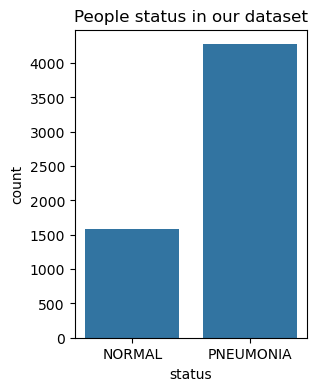

In [61]:
plt.figure(figsize=(3, 4))
sns.countplot(data  = df_picture, x = 'status')
plt.title(f"People status in our dataset")

plt.plot()

[]

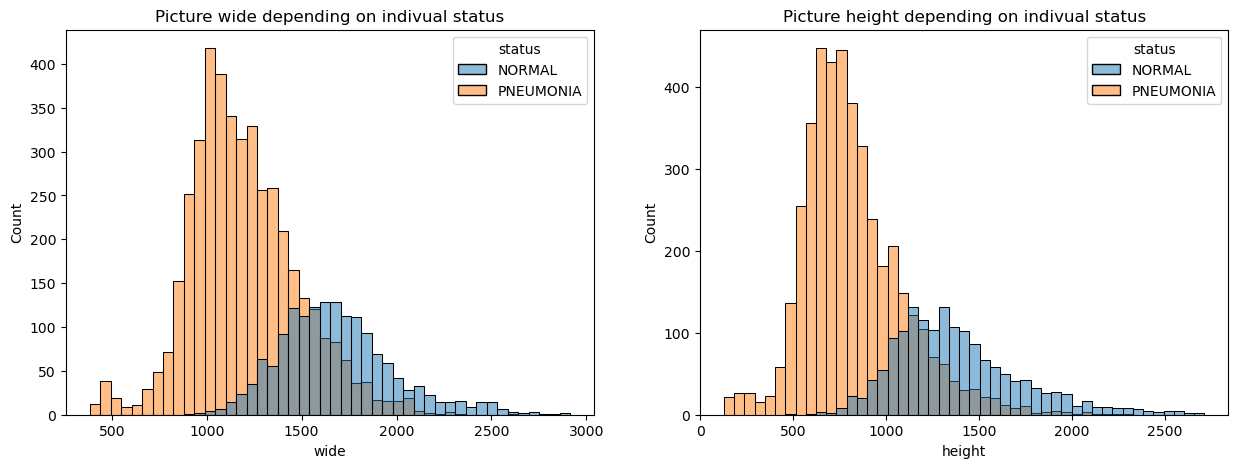

In [55]:
plt.figure(figsize=(15, 5))
pos = 1
for i in ['wide', 'height']:
    plt.subplot(1,2,pos)
    sns.histplot(data  = df_picture, x = i, hue = 'status')
    plt.title(f"Picture {i} depending respecting the people status")
    pos += 1

plt.plot()

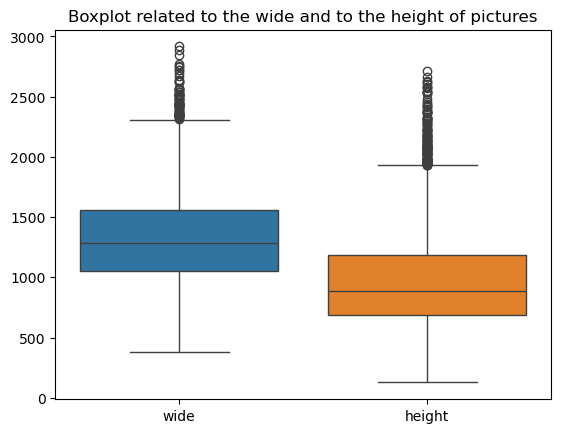

In [68]:
sns.boxplot(df_picture)
plt.title('Boxplot related to the wide and to the height of pictures')
plt.show()